# Ice-age dynamics: Paleo-climate
----

## Yearly temperatures from the Hohenpeissenberg Observatory in Bavaria

(203,)


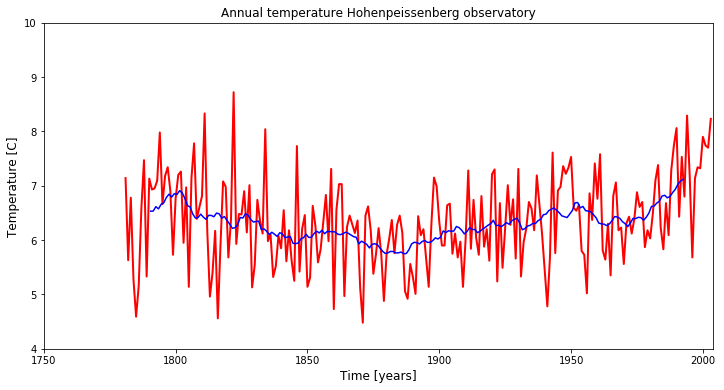

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/Hohenpeissenberg.temp'
year=np.loadtxt(fname=infile1,skiprows=1,usecols=0)
temp=np.loadtxt(fname=infile1,skiprows=1,usecols=1)
print (type(temp),temp.shape)

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def temp_plot(average):
    plt.figure(figsize=(12.0, 6.0))
    plt.xlabel('Time [years]',size=12)
    plt.ylabel('Temperature [C]',size=12)
    plt.title('Annual temperature Hohenpeissenberg observatory',size=12)
    yearsum = np.zeros(len(year)-average)
    tempsum = np.zeros(len(temp)-average)
    print(yearsum.shape)
    for i in range(len(temp[:])-average):
        yearsum[i] = sum(year[i:i+average]) / float(average)
        tempsum[i] = sum(temp[i:i+average]) / float(average)
    plt.plot(year,temp,color='red',linestyle='-',linewidth=2)
    plt.plot(yearsum,tempsum,color='blue',linestyle='-',linewidth=1.5)
    plt.xlim([1750,2004])
    plt.ylim([4,10])
    plt.show()
    
# call interactive module
interactive_plot = interactive(temp_plot, average=widgets.IntSlider(min=1,max=50,step=1,value=1))
output = interactive_plot.children[-1]
interactive_plot

## Stable Hydrogen record in Vostok and Dome C ice cores

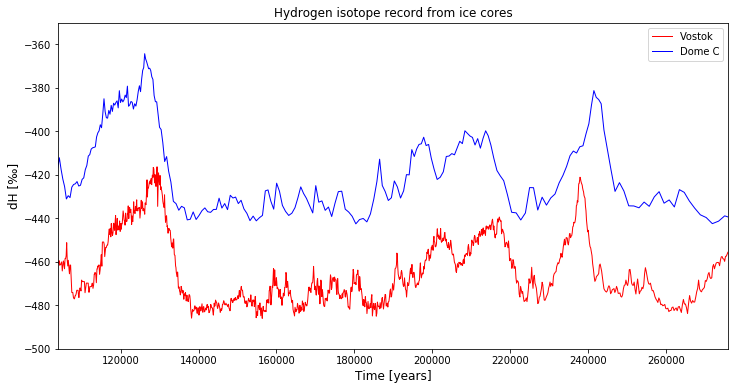

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/Vostok_dH.x'
year1=np.loadtxt(fname=infile1,skiprows=1,usecols=0)
Vostok_dH=np.loadtxt(fname=infile1,skiprows=1,usecols=1)
infile2='data/DomeC_dH.x'
year2=np.loadtxt(fname=infile2,skiprows=1,usecols=0)
DomeC_dH=np.loadtxt(fname=infile2,skiprows=1,usecols=1)

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def dH_plot(min,max,vostok,domec):
    plt.figure(figsize=(12.0, 6.0))
    plt.xlabel('Time [years]',size=12)
    plt.ylabel('dH [\u2030]',size=12)
    plt.title('Hydrogen isotope record from ice cores',size=12)
    if (vostok):
        plt.plot(year1,Vostok_dH,color='red',linestyle='-',linewidth=1,label='Vostok')
    if (domec):
        plt.plot(year2,DomeC_dH,color='blue',linestyle='-',linewidth=1,label='Dome C')
    plt.xlim([min,max])
    plt.ylim([-500,-350])
    plt.legend(loc='upper right')
    plt.show()
    
# call interactive module
interactive_plot = interactive(dH_plot, min=widgets.IntSlider(min=0,max=700000,step=1000,value=1),
                                        max=widgets.IntSlider(min=0,max=700000,step=1000,value=700000),
                                        vostok=widgets.Checkbox(value=True,description='Vostok',disabled=False),
                                        domec=widgets.Checkbox(value=False,description='Dome C',disabled=False))
#interactive_plot = interactive(dH_plot,x=widgets.IntRangeSlider(value=[1000, 500000],min=0,max=700000,step=1000))
output = interactive_plot.children[-1]
interactive_plot